In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import datetime as dt

In [2]:
df=pd.read_csv('fx_expanded_majors.csv', delimiter=';')

In [3]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

df=df.set_index('Date')

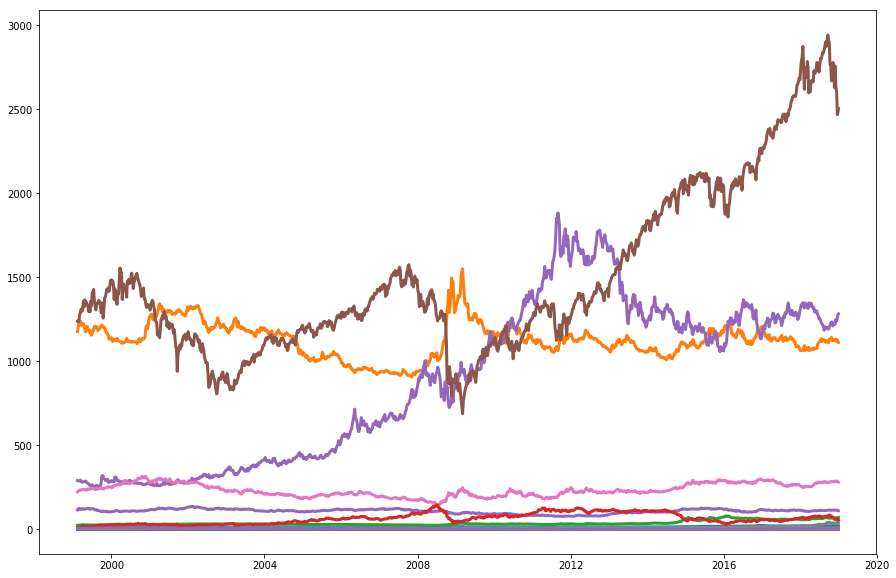

In [4]:
plt.figure(figsize=(15,10.))
for c in df.loc[:,df.columns!='USDIDR'].columns.values:
    plt.plot(df.index, df[c], lw=3)


Moving window generation

In [5]:
def rolling_pca(window_data):
    transf=StandardScaler().fit_transform(window_data)
    pca = PCA(n_components=2)
    pca.fit(transf)
    return pca.components_[0], pca.components_[1]

In [7]:
X_std=StandardScaler().fit_transform(df)

C:\Users\MO_Reuters_2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MO_Reuters_2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [58]:
pc1=[]
pc2=[]
weights1=[]
weights2=[]

for i in X_std_1.index.year.unique():
    data=rolling_pca(X_std_1[X_std_1.index.year==i])
    pc1.append(data[0])
    pc2.append(data[1])
    weights1.append(np.square(data[0]))
    weights2.append(np.square(data[1]))

pc1=[]
pc2=[]
weights1=[]
weights2=[]

for i in range(52,X_std.shape[0],52):
    data=rolling_pca(X_std[i-52:i,:])
    pc1.append(data[0])
    pc2.append(data[1])
    weights1.append(np.square(data[0]))
    weights2.append(np.square(data[1]))

In [62]:
w1=pd.DataFrame(weights1,index=X_std_1.index.year.unique(),columns=df.columns.tolist())
w2=pd.DataFrame(weights2,index=X_std_1.index.year.unique(),columns=df.columns.tolist())

w1_tr=w1.transpose()
w2_tr=w2.transpose()

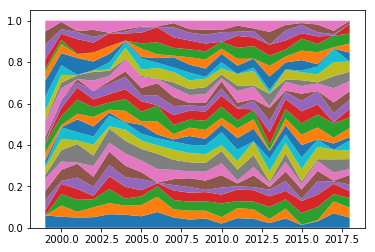

In [64]:
labels=df.columns.tolist()
x=range(19)
fig, ax = plt.subplots()
ax.stackplot(X_std_1.index.year.unique(), w1_tr)
plt.show()

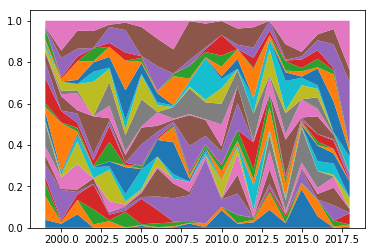

In [66]:
labels=df.columns.tolist()
x=range(19)
fig, ax = plt.subplots()
ax.stackplot(X_std_1.index.year.unique(), w2_tr)
plt.show()